# Facial Similarity <a name="top"></a>

Often instead of just checking if two faces match or not (True or False), it's helpful to see how similar they are.

You can do that by using the `face_distance` function.

The model was trained in a way such that faces with a distance of 0.6 or less should be a match. But if you want to be more strict, you can look for a smaller face distance. For example, using a 0.55 cutoff would reduce false positive matches at the risk of more false negatives.

**Note**: This isn't exactly the same as a "percent match". The scale isn't linear. But you can assume that images with a smaller distance are more similar to each other than ones with a larger distance.

Useful Reference: https://machinelearningmastery.com/how-to-develop-a-face-recognition-system-using-facenet-in-keras-and-an-svm-classifier/

- [Dlib](#dlib)
- [FaceNet](#facenet)

## Dlib <a name="dlib"></a>

Embedding vectors are of dimension `(1, 128)`.

[Back to top](#top)

In [1]:
import face_recognition
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import os

In [4]:
# Load some images to compare against
known_biden_image_1 = face_recognition.load_image_file("../images/joe_biden/joe_biden_1.jpg")
known_biden_image_2 = face_recognition.load_image_file("../images/joe_biden/joe_biden_2.jpg")

In [5]:
# Get the face encodings for the known images
biden_face_encoding_1 = face_recognition.face_encodings(known_biden_image_1)[0]
biden_face_encoding_2 = face_recognition.face_encodings(known_biden_image_2)[0]

known_encodings = [
    biden_face_encoding_1,
    biden_face_encoding_2
]

All images are turned into a embedding vector of length `1 x 128`.

In [14]:
biden_face_encoding_2.shape

(128,)

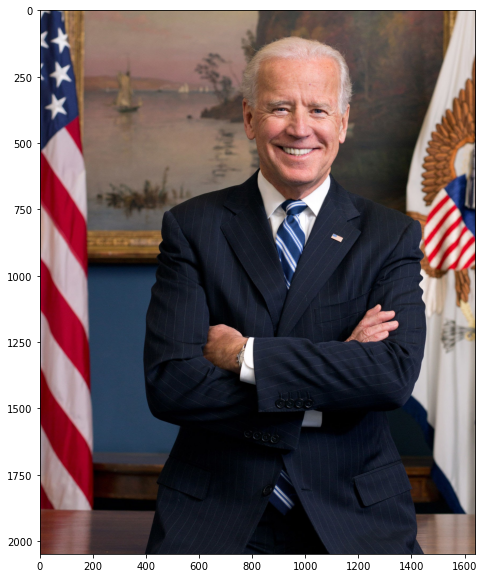

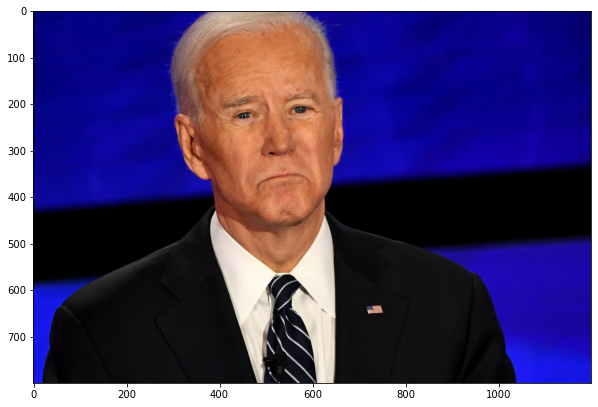

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(known_biden_image_1)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(known_biden_image_2)
plt.show()

In [8]:
# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("../images/joe_biden/joe_biden_1.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

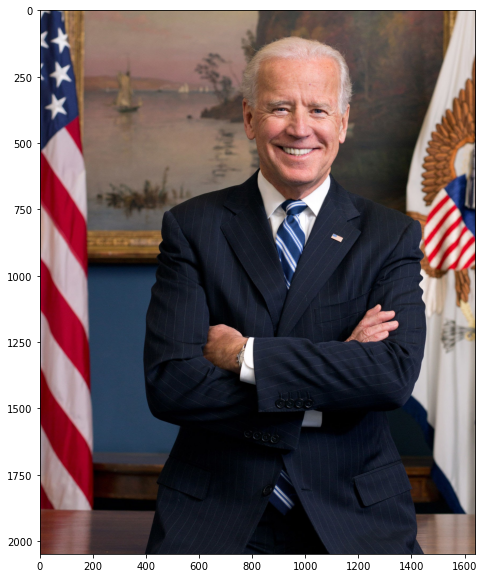

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(image_to_test)
plt.show()

In [10]:
# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

print(face_distances)

[0.         0.46048388]


In [11]:
for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

The test image has a distance of 0.0 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.46 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True



## Check if resizing the image affects the similarity score

In [16]:
import cv2

In [17]:
# Load some images to compare against
known_biden_image_1 = face_recognition.load_image_file("../images/joe_biden/joe_biden_1.jpg")
known_biden_image_2 = face_recognition.load_image_file("../images/joe_biden/joe_biden_2.jpg")

In [18]:
(h,w) = known_biden_image_2.shape[:2]

NEW_WIDTH = 500
NEW_HEIGHT = int(h * (NEW_WIDTH / float(w)))
resized_known_biden_image_2 = cv2.resize(known_biden_image_2, (NEW_WIDTH, NEW_HEIGHT))

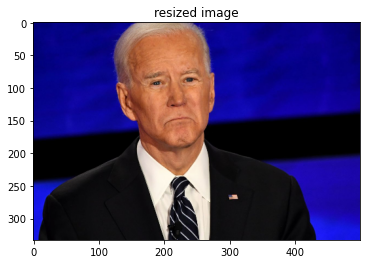

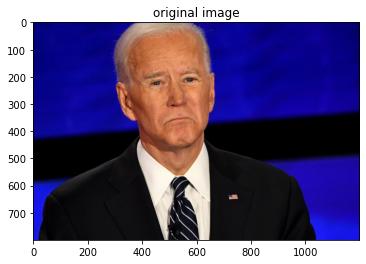

In [19]:
plt.imshow(resized_known_biden_image_2)
plt.title("resized image")
plt.show()

plt.imshow(known_biden_image_2)
plt.title("original image")
plt.show()

In [20]:
original_face_encoding = face_recognition.face_encodings(known_biden_image_2, known_face_locations=None, num_jitters=1, model="large")[0]
resized_face_encoding = face_recognition.face_encodings(resized_known_biden_image_2, known_face_locations=None, num_jitters=1, model="large")[0]

In [21]:
# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(original_face_encoding, [resized_face_encoding])

print(face_distances)

[0.06281071]


In [22]:
resized_face_encoding.shape

(128,)

In [23]:
original_face_encoding.shape

(128,)

## Perform facial detection first then perform facial similarity

In [24]:
face_locations = face_recognition.face_locations(known_biden_image_2)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

I found 1 face(s) in this photograph.


A face is located at pixel location Top: 142, Left: 379, Bottom: 409, Right: 646


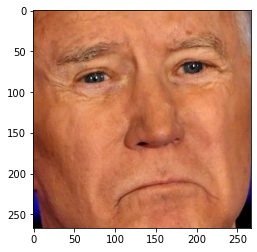

In [25]:
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = known_biden_image_2[top:bottom, left:right]
    plt.imshow(face_image)
    plt.show()

In [26]:
original_face_encoding = face_recognition.face_encodings(known_biden_image_2, known_face_locations=None, num_jitters=1, model="large")[0]
face_only_encoding = face_recognition.face_encodings(face_image, known_face_locations=None, num_jitters=1, model="large")[0]

In [27]:
# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(original_face_encoding, [resized_face_encoding])

print(face_distances)

[0.06281071]


## Facial Similarity of 2 identical image with no faces

In [33]:
# Load some images to compare against
ditto_image = face_recognition.load_image_file("../images/miscellaneous/ditto.png")

In [34]:
# Get the face encodings for the known images
ditto_encoding = face_recognition.face_encodings(ditto_image)[0]

known_encodings = [
    ditto_encoding,
]

IndexError: list index out of range

In [35]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("../images/miscellaneous/many-asian-male-faces.jpg")

In [101]:
def calc_face_distance(image_path_1, image_path_2):
    image_1 = face_recognition.load_image_file(image_path_1)
    image_2 = face_recognition.load_image_file(image_path_2)

    # Get the face encodings for the images
    face_encoding_1 = face_recognition.face_encodings(image_1)
    face_encoding_2 = face_recognition.face_encodings(image_2)
    
    # calculate no. of faces found
    num_faces_1 = len(face_encoding_1)
    num_faces_2 = len(face_encoding_2)
    
    print(f"{num_faces_1} face(s) found in {image_path_1}.")
    print(f"{num_faces_2} face(s) found in {image_path_2}.")
    
    # if a single face is found in both images, then calculate similarity score
    if num_faces_1 == 1 and num_faces_2 == 1:
        face_distances = face_recognition.face_distance([face_encoding_1[0]], face_encoding_2[0])
        return 1 - face_distances
    
    else:
        return None
    
face_similarity = calc_face_distance("../images/ditto.png", "../images/joe_biden_1.jpg")
print(face_similarity)

0 face(s) found in ../images/ditto.png.
1 face(s) found in ../images/joe_biden_1.jpg.
None


## FaceNet <a name="facenet"></a>

Embedding vectors are of dimension `(1, 512)`.

- [For two images](#facenet-two-images)
- [For multiple images](#facenet-multiple-images)

[Back to top](#top)

### FaceNet for two images <a name="facenet-two-images"></a>

[Back to top](#top)

In [39]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os
from PIL import Image
import math

workers = 0 if os.name == 'nt' else 4

def distance(embeddings1, embeddings2, distance_metric='euclidean'):
    '''
    Distance metric for 2 embedding vectors.
    
    :param embeddings1: first embedding, shape of 1 x N
    :type embeddings1: numpy.ndarray

    :param embeddings2: second embedding, shape of 1 x N
    :type embeddings2: numpy.ndarray
    
    :param distance_metric: the distance metric to use to compare similarity
        between two embedding vectors.
    :type distance_metric: str
    
    :return dist: distance between the embedding vectors based on the selected distance metric
    :rtype dist: float
    '''

    if distance_metric=='euclidean':
        # Euclidian distance
        dist = np.linalg.norm(embeddings1 - embeddings2)
    
    elif distance_metric=='cosine':
        # Distance based on cosine similarity
        dot = np.sum(np.multiply(embeddings1, embeddings2))
        norm = np.linalg.norm(embeddings1) * np.linalg.norm(embeddings2)
        similarity = dot / norm
        
        # to round down for round-off errors where `similarity = 1.00001`
        if similarity > 1:
            similarity = 1
        if similarity < -1:
            similarity = -1
        
        dist = np.arccos(similarity) / math.pi
    else:
        raise f"Undefined distance metric: {distance_metric}"

    return dist


def face_similarity_two_img(image_path_1, image_path_2):

    embeddings = []

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('Running on device: {}'.format(device))

    # for detecting bounding box for face(s)
    mtcnn = MTCNN(
        image_size=160, margin=0, min_face_size=20,
        thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
        keep_all=True, device=device
    )

    # for generating embeddings for a face image
    resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

    for i in range(len(IMAGE_PATHS)):
        image_path = IMAGE_PATHS[i]

        image = Image.open(image_path).convert("RGB")

        face_images, prob = mtcnn(image, return_prob=True)

        print(f"{len(face_images)} face(s) found in {image_path}")

        if len(face_images) == 1:
            embedding = resnet(face_images).detach().cpu()
            embeddings.append(embedding[0])

    e1 = embeddings[0]
    e2 = embeddings[1]

    face_similarity = 1 - distance(e1.numpy(), e2.numpy(), distance_metric='cosine')
    
    return face_similarity

In [51]:
IMAGE_PATHS = ['../images/ariana_grande/ariana_grande_1.jpeg',
               '../images/cellist_laufey/00001.jpg']

face_similarity_two_img(IMAGE_PATHS[0], IMAGE_PATHS[1])

Running on device: cpu
1 face(s) found in ../images/ariana_grande/ariana_grande_1.jpeg
1 face(s) found in ../images/cellist_laufey/00001.jpg


0.5277385985615066

In [52]:
embeddings = []

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

# for detecting bounding box for face(s)
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    keep_all=True, device=device
)

# for generating embeddings for a face image
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

for i in range(len(IMAGE_PATHS)):
    image_path = IMAGE_PATHS[i]

    image = Image.open(image_path).convert("RGB")

    face_images, prob = mtcnn(image, return_prob=True)

    print(f"{len(face_images)} face(s) found in {image_path}")

    if len(face_images) == 1:
        embedding = resnet(face_images).detach().cpu()
        embeddings.append(embedding[0])

e1 = embeddings[0]
e2 = embeddings[1]

Running on device: cpu
1 face(s) found in ../images/ariana_grande/ariana_grande_1.jpeg
1 face(s) found in ../images/cellist_laufey/00001.jpg


In [55]:
embeddings[0].shape

torch.Size([512])

### FaceNet for multiple images <a name="facenet-multiple-images"></a>

[Back to top](#top)

In [65]:
def face_similarity_multiple_img():
    pass

In [92]:
face_similarity_df.to_csv('facenet_facial_similarity_cosine.csv')

In [84]:
face_similarity_df.max().max()

0.6563232744122618

In [94]:
for i in range(len(face_similarity_df)):
    print(face_similarity_df.index[i])
    most_similar_idx = face_similarity_df.replace(to_replace={1:np.nan}).iloc[i,:].argmax()
    print(face_similarity_df.index[most_similar_idx])
    print('-'*80)

ariana_grande/ariana_grande_1.jpeg
ariana_grande/ariana_grande_2.png
--------------------------------------------------------------------------------
ariana_grande/ariana_grande_2.png
ariana_grande/ariana_grande_2.png
--------------------------------------------------------------------------------
cellist_laufey/00001.jpg
cellist_laufey/00020.jpg
--------------------------------------------------------------------------------
cellist_laufey/00020.jpg
cellist_laufey/00001.jpg
--------------------------------------------------------------------------------
cellist_laufey/00067.jpg
cellist_laufey/00390.jpg
--------------------------------------------------------------------------------
cellist_laufey/00390.jpg
cellist_laufey/00001.jpg
--------------------------------------------------------------------------------
cellist_laufey/00634.jpg
cellist_laufey/00001.jpg
--------------------------------------------------------------------------------
guitarist_andrew_foy/00001.jpg
guitarist_andre

youtuber_davie504/00207.jpg
--------------------------------------------------------------------------------
youtuber_davie504/00804.jpg
youtuber_davie504/00002.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00001.jpg
youtuber_prozd/00070.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00002.jpg
youtuber_prozd/00024.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00024.jpg
youtuber_prozd/00002.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00070.jpg
youtuber_prozd/00001.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00158.jpg
youtuber_prozd/00234.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00234.jpg
youtuber_prozd/00158.jpg
-------------------------------------------------